<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

Файл dst-3.0_16_1_hh_database.csv размещен на гугл-диске. Ссылка: https://drive.google.com/file/d/1euSn2pEwRfp_k1VPasbLEs1ftvEzTXtE/view?usp=sharing

In [ ]:
#ваш код здесь
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

In [4]:
hh_data.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [ ]:
#ваш код здесь
hh_data.head(5)

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [69]:
#ваш код здесь
display(hh_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Обновление резюме                44744 non-null  object
 10  Авто                             44744 non-null  object
 11  Образование                      44744 non-null  object
 12  Пол                             

None

5. Выведите основную статистическую информацию о столбцах.


In [10]:
#ваш код здесь
print(hh_data['Опыт работы'].nunique()) # Сколько уникальных значений содержится в столбце «Опыт работы»

44413


In [14]:
hh_data['Ищет работу на должность:'].mode() # Какая из искомых должностей самая распространённая.

0    Системный администратор
Name: Ищет работу на должность:, dtype: object

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [31]:
#ваш код здесь
print(hh_data['Образование и ВУЗ'].loc[177])

# На вход данной функции поступает строка с Образование и ВУЗ.
def get_education_level(address):
# Метод split() разбивает строку на слова по пробелу.
# В результате получаем список слов в строке и заносим его в переменную address_list.
    address = address.lower()
    address_list = address.split(' ')
# Обрезаем список, оставляя в нём только первые два,
    street_type = address_list[:2]
# Возвращаем переменную street_type, в которой хранится строка с уровнем образования.
    return ' '.join(street_type)

# Теперь применим эту функцию к столбцу Образование и ВУЗ. Для этого передадим функцию аргумент метода столбца apply(). 
# В результате получим объект Series, который положим в переменную street_types:
street_types = hh_data['Образование и ВУЗ'].apply(get_education_level)
display(street_types.value_counts())
# Метод apply() применяется к каждому его элементу.

Высшее образование 1998 Ташкентский Электротехнический Институт Связи Радиовещание и телевидение, Инженер радиокосмической и тропосферной связи


Образование и ВУЗ
высшее образование     33863
среднее специальное     5765
неоконченное высшее     4557
среднее образование      559
Name: count, dtype: int64

In [ ]:
# Создаем новый признак
hh_data['Образование'] = street_types
display(hh_data['Образование'])

In [36]:
display(hh_data['Образование'].value_counts()) # Сколько соискателей имеет средний уровень образования (школьное образование)?

Образование
высшее образование     33863
среднее специальное     5765
неоконченное высшее     4557
среднее образование      559
Name: count, dtype: int64

In [37]:
# Удаляем признак Образование и ВУЗ
hh_data = hh_data.drop('Образование и ВУЗ', axis=1)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [50]:
#ваш код здесь
# 1) Создание признака Пол
def get_gender(gender):
    gender_type = gender.split()[0] # берем первое слово из строки
    if gender_type == 'Мужчина':
        return 'М'
    else: return 'Ж'

hh_data['Пол'] = hh_data['Пол, возраст'].apply(get_gender)

In [79]:
display(hh_data['Пол'].value_counts(normalize=True) * 100) # Сколько процентов женских резюме представлено в наших данных?

Пол
М    80.929287
Ж    19.070713
Name: proportion, dtype: float64

In [73]:
# 2) Создание признака Возраст
def get_age(gender):
    age_type = int(gender.split()[2]) # берем третье слово из строки
    return age_type

hh_data['Возраст'] = hh_data['Пол, возраст'].apply(get_age)

In [78]:
display(hh_data['Возраст'].mean()) Чему равен средний возраст соискателей?

32.19674146254246

In [80]:
hh_data = hh_data.drop('Пол, возраст', axis=1)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [95]:
#ваш код здесь
def get_experience(arg):
    try:
        month_key_words = ['месяц', 'месяцев', 'месяца']
        year_key_words = ['год', 'лет', 'года']
        args_splited = arg.split(' ')
        args_splited = args_splited[:6]
        # print(args_splited)
        month = 0
        year = 0
        for i in range(len(args_splited)):
            if args_splited[i] in month_key_words:
                month = args_splited[i-1]
            if args_splited[i] in year_key_words:
                year = args_splited[i-1]
        return int(year)*12 + int(month)
    except (ValueError, AttributeError):
        return 'NaN'

hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_experience)

In [97]:
display(hh_data['Опыт работы (месяц)'].median()) # Чему равен медианный опыт работы (в месяцах) в нашей таблице?

100.0

In [98]:
hh_data = hh_data.drop('Опыт работы', axis=1)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [101]:
#ваш код здесь
# Создаем признак Город
def get_city(city_info):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    city_info = city_info.split(' , ')
    city_1 = city_info[0]
    if city_1 == 'Москва' or city_1 == 'Санкт-Петербург':
        city = city_1
    else:
        if city_1 in million_cities:
            city = "город миллионник"
        else:
            city = "другие"
    return city

hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)

In [115]:
display(hh_data['Город'].value_counts(normalize=True) * 100) # Сколько процентов соискателей живут в Санкт-Петербурге?

Город
Москва              37.146880
другие              35.432684
город миллионник    16.386555
Санкт-Петербург     11.033882
Name: proportion, dtype: float64

In [108]:
# Создаем признак Готовность к переезду
print(hh_data['Город, переезд, командировки'].loc[177])

def get_removal(removal_info):
    priz = 'не'
    removal_info = removal_info.lower()
    removal_info_list = removal_info.split(',')
# Обрезаем список, оставляя в нём второй с конца элемент
    removal_type = removal_info_list[-2]
    if priz in removal_type:
        return False
    else: return True

removal_types = hh_data['Город, переезд, командировки'].apply(get_removal)
hh_data['Готовность к переезду'] = removal_types


Москва , не готов к переезду , готов к командировкам


In [113]:
# Создаем признак Готовность к командировкам
def get_trip(trip_info):
    priz = 'не'
    trip_info = trip_info.lower()
    trip_info_list = trip_info.split(',')
# Обрезаем список, оставляя в нём первый с конца элемент
    trip_type = trip_info_list[-1]
    # print(trip_type)
    if priz in trip_type:
        return False
    else: return True

trip_types = hh_data['Город, переезд, командировки'].apply(get_trip)
# display(trip_types.value_counts())
# display(trip_types)
hh_data['Готовность к командировкам'] = trip_types

In [118]:
# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? 
removal = hh_data['Готовность к переезду'] == True
trip = hh_data['Готовность к командировкам'] == True
print(hh_data[removal & trip].count()[0]/hh_data.shape[0] * 100)

31.90818880743787


In [119]:
hh_data = hh_data.drop('Город, переезд, командировки', axis=1)

In [121]:
hh_data.tail(2)

ЗП Ищет работу на должность:  \
44742   20000 руб.          Контент-менеджер   
44743  120000 руб.      Руководитель проекта   

                                   Занятость            График  \
44742  частичная занятость, полная занятость  удаленная работа   
44743                       полная занятость       полный день   

      Последнее/нынешнее место работы  \
44742                       IQ-Maxima   
44743               ПАО ГК ТНС энерго   

                    Последняя/нынешняя должность Обновление резюме  \
44742                          Менеджер проектов  26.04.2019 14:25   
44743  Руководитель отдела технической поддержки  05.07.2018 20:15   

                                 Авто         Образование Пол  Возраст  \
44742  Имеется собственный автомобиль  высшее образование   М       24   
44743                      Не указано  высшее образование   М       38   

      Опыт работы (месяц)   Город  Готовность к переезду  \
44742                  46  другие                  False   
44743                 190  Москва                  False   

       Готовность к командировкам  
44742                       False  
44743                       False

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [122]:
#ваш код здесь
# Создание новых признаков
#1) занятость
busyness = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка'] # список возможных вариантов
for elem in busyness:
    hh_data[elem] = hh_data['Занятость'].apply(lambda x: elem in x) # в lambda передаем соответствующую запись признака
#2) расписание
schedule = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
for elem in schedule:
    hh_data[elem] = hh_data['График'].apply(lambda x: elem in x)

In [124]:
# Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
hh_data[(hh_data['проектная работа'] == True) & (hh_data['волонтерство'] == True)].shape[0]

436

In [125]:
# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
hh_data[(hh_data['вахтовый метод'] == True) & (hh_data['гибкий график'] == True)].shape[0]

2311

In [126]:
hh_data = hh_data.drop('Занятость', axis=1) # удаление
hh_data = hh_data.drop('График', axis=1)

In [ ]:
hh_data.tail(2)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [129]:
#ваш код здесь
rates_data = pd.read_csv('data\ExchangeRates.csv', sep=',') # импорт курсов

In [153]:
hh_data.tail(2)

ЗП Ищет работу на должность: Последнее/нынешнее место работы  \
44742   20000 руб.          Контент-менеджер                       IQ-Maxima   
44743  120000 руб.      Руководитель проекта               ПАО ГК ТНС энерго   

                    Последняя/нынешняя должность Обновление резюме  \
44742                          Менеджер проектов  26.04.2019 14:25   
44743  Руководитель отдела технической поддержки  05.07.2018 20:15   

                                 Авто         Образование Пол  Возраст  \
44742  Имеется собственный автомобиль  высшее образование   М       24   
44743                      Не указано  высшее образование   М       38   

      Опыт работы (месяц)  ... стажировка  полный день  сменный график  \
44742                  46  ...      False        False           False   
44743                 190  ...      False         True           False   

       гибкий график  удаленная работа  вахтовый метод        Date  amount  \
44742          False              True           False  2019-04-26   20000   
44743          False             False           False  2018-07-05  120000   

       Валюта  ЗП (руб)  
44742     RUB   20000.0  
44743     RUB  120000.0  

[2 rows x 27 columns]

In [149]:
hh_data = hh_data.drop('currency', axis=1)

In [151]:
display(rates_data.head(5))

currency per      date   time    close  vol  proportion    Date_New
0      USD   D  29/12/17  00:00  57.6291    0           1  2017-12-29
1      USD   D  30/12/17  00:00  57.6002    0           1  2017-12-30
2      USD   D  31/12/17  00:00  57.6002    0           1  2017-12-31
3      USD   D  01/01/18  00:00  57.6002    0           1  2018-01-01
4      USD   D  02/01/18  00:00  57.6002    0           1  2018-02-01

In [ ]:
# 1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату.
# В тот же формат привести признак "date" из таблицы с валютами.
hh_data['Date'] = pd.to_datetime(hh_data['Обновление резюме']).dt.date
rates_data['Date_New'] = pd.to_datetime(rates_data['date']).dt.date
# display(hh_data['Date'])

In [139]:
# 2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. 
# Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
# 1) выделение суммы
def get_amount(amount):
    amount_type = int(amount.split()[0]) # берем первое слово из строки
    return amount_type

hh_data['amount'] = hh_data['ЗП'].apply(get_amount)


In [144]:
# 2) выделение валюты
def get_currency(currency):
    currency_type = currency.split()[1] # берем второе слово из строки
    currency_type = currency_type.replace(".", "")
    return currency_type

hh_data['currency'] = hh_data['ЗП'].apply(get_currency)


In [146]:
#3) перевод валюты в стандарт ISO
def rename_currency(arg):
    currency = {'USD': 'USD', 'KZT': 'KZT', 'грн': 'UAH', 'белруб': 'BYN', 'EUR': 'EUR', 'KGS': 'KGS', 'сум': 'UZS', 'AZN': 'AZN'}
    curr = arg.split(' ')[0]
    if curr == 'руб':
        return 'RUB'
    else:
        return currency[curr]

hh_data['Валюта'] = hh_data['currency'].apply(rename_currency)  

In [152]:
# 3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты 
# (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, 
# изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
# Объединим оба DataFrame, для чего используем метод merge
merged = hh_data.merge(
    rates_data,
    how = 'left',
    left_on=['Валюта', 'Date'],
    right_on=['currency','Date_New']    
)

# Заполним столбец close и proportion значением 1.0 для рубля
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)
# Создадим новый признак заработной платы
hh_data['ЗП (руб)'] =  merged['close'] * merged['amount']/ merged['proportion']

In [ ]:
# Удалим ненужные признаки
hh_data.drop(labels=['ЗП', 'amount', 'Валюта', 'Date'], axis=1, inplace=True)

In [155]:
# Медианная желаемая ЗП
hh_data['ЗП (руб)'].median()/1000

59.0

In [156]:
display(hh_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44744 non-null  object 
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

None

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [157]:
display(hh_data.head(2))

Ищет работу на должность: Последнее/нынешнее место работы  \
0   Системный администратор         МАОУ "СОШ № 1 г.Немана"   
1      Технический писатель    Временный трудовой коллектив   

                       Последняя/нынешняя должность Обновление резюме  \
0                           Системный администратор  16.04.2019 15:59   
1  Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   

                             Авто          Образование Пол  Возраст  \
0  Имеется собственный автомобиль  неоконченное высшее   М       39   
1                      Не указано   высшее образование   М       60   

  Опыт работы (месяц)   Город  ...  частичная занятость  проектная работа  \
0                 202  другие  ...                 True              True   
1                 233  другие  ...                 True              True   

   волонтерство  стажировка  полный день  сменный график  гибкий график  \
0         False       False         True            True           True   
1         False       False         True            True           True   

   удаленная работа  вахтовый метод  ЗП (руб)  
0              True            True   29000.0  
1              True           False   40000.0  

[2 rows x 23 columns]

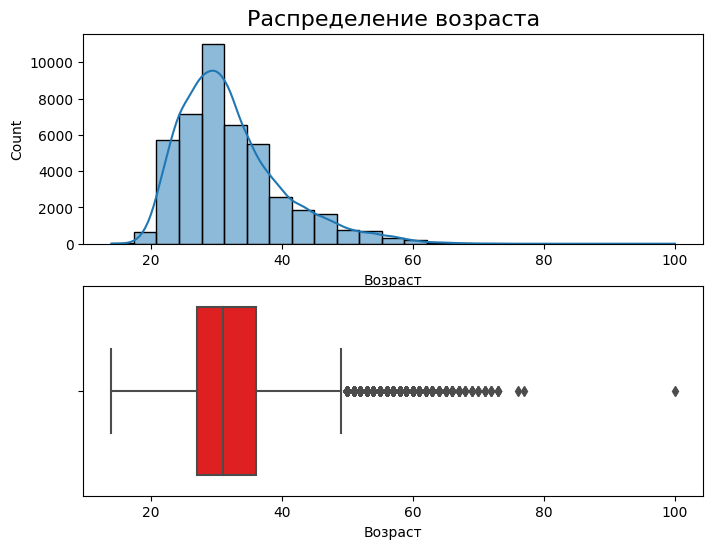

In [162]:
# ваш код здесь
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.histplot(
    data=hh_data,
    x='Возраст',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Распределение возраста', fontsize=16)
sns.boxplot(
    data=hh_data,
    x='Возраст',
    # y='country',
    orient='h',
    color='red',
    ax=axes[1]
);

ваши выводы по графику здесь
Распределение близко к нормальному с ассиметрией вправо.
Возраст большинства соискателей находится в интервале от 21 до 46 лет. Межквартильный диапазон составляет от 21 до 46 лет. Минимальное и максимальное значения - 14 и 100 лет
Мода распределения = 30 лет
Возраст большинства соискателей находится в диапазоне от 27 до 36 лет, согласно коробчатому графику
Следует детальнее рассмотреть значение 100 лет, так как оно является слишком большим, а до него ближайший возраст - 77 лет. Возможно это значение будет аномалией

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [174]:
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы (месяц)'].replace(r'NaN', np.nan, regex=True)

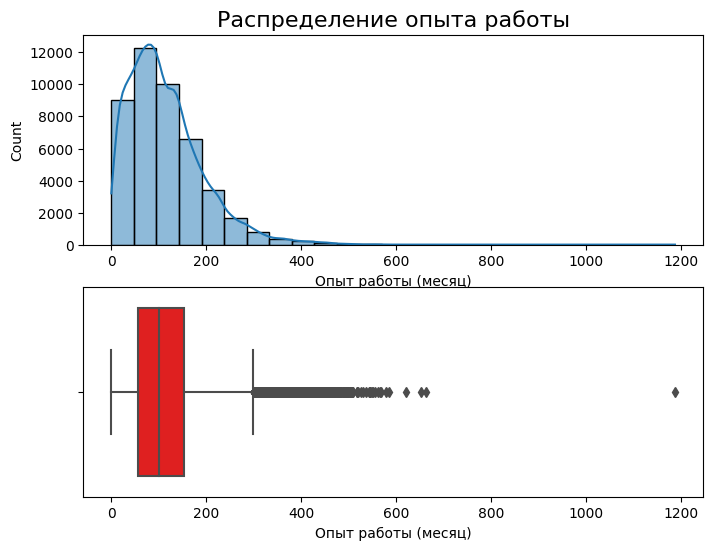

In [176]:
# ваш код здесь
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.histplot(
    data=hh_data,
    x='Опыт работы (месяц)',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Распределение опыта работы', fontsize=16)
sns.boxplot(
    data=hh_data,
    x='Опыт работы (месяц)',
    # y='country',
    orient='h',
    color='red',
    ax=axes[1]
);

In [178]:
experience= hh_data['Опыт работы (месяц)']
print('Min experience:', experience.min())
print('Max experience:', experience.max())
print('Mode experience:', experience.mode()[0])

Min experience: 0.0
Max experience: 1188.0
Mode experience: 81.0


In [179]:
hh_data.describe().loc[:, ['Опыт работы (месяц)']]

Опыт работы (месяц)
count         44576.000000
mean            114.413810
std              79.049803
min               0.000000
25%              57.000000
50%             100.000000
75%             154.000000
max            1188.000000

ваши выводы здесь
Распределение близко к нормальному с ассиметрией вправо.
Модальное значение = 81
Минимальное и максимальное значения - 0 и 1188 месяцев
Опыт большинства соискателей находится в диапазоне от 1 до 300 месяцев.
Межквартильный диапазон составляет от 57 до 154 месяцев.
На распределении наблюдается явная аномалия 1188 месяцев = 99 годам, даже учитывая, что самому пожилому соискателю 100 лет.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


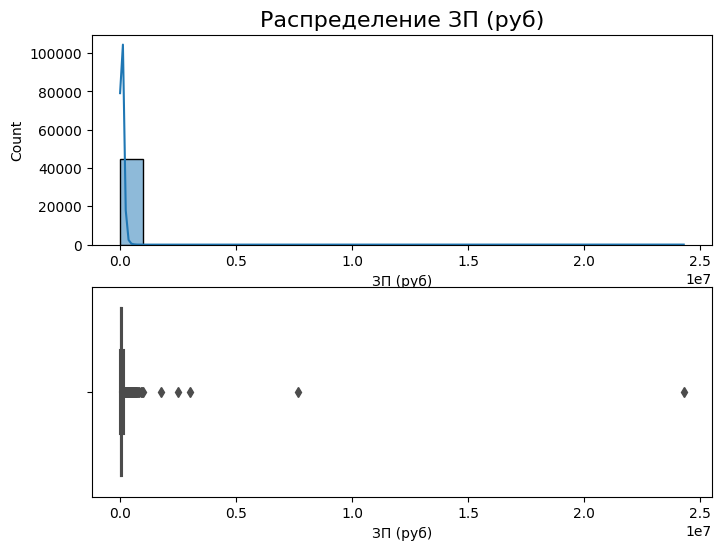

In [183]:
# ваш код здесь
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.histplot(
    data=hh_data,
    x='ЗП (руб)',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Распределение ЗП (руб)', fontsize=16)
sns.boxplot(
    data=hh_data,
    x='ЗП (руб)',
    # y='',
    orient='h',
    color='red',
    ax=axes[1]
);

In [184]:
hh_data.describe().loc[:, ['ЗП (руб)']]

ЗП (руб)
count  4.474400e+04
mean   7.652146e+04
std    1.359203e+05
min    1.000000e+00
25%    3.708220e+04
50%    5.900000e+04
75%    9.500000e+04
max    2.430488e+07

In [185]:
salary= hh_data['ЗП (руб)']
print('Min salary:', salary.min())
print('Max salary:', salary.max())
print('Mode salary:', salary.mode()[0])

Min salary: 1.0
Max salary: 24304876.0
Mode salary: 50000.0


ваши выводы здесь
На гистограмме наблюдаются многочисленные выбросы.
Мода распределения составляет 50 тысяч рублей.
Минимальное и максимальное значения желаемой заработной платы - 1 рубль и 24,3 миллиона рублей
У большинства соискателей ЗП находится в диапазоне от 2,5 до 150 тысяч рублей, межквартильный интервал составляет 37 - 95 тысяч рублей.
Аномальным значением является желаемая ЗП в 24 миллиона рублей. Вероятно, пользователь ошибся.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [200]:
# ваш код здесь
mask = hh_data['ЗП (руб)'] < 1000000
bar_data = hh_data.groupby(
    by='Образование',
    as_index=False
)[['ЗП (руб)']].median()

fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="Образование", #ось x
    y="ЗП (руб)", #ось y
    color='Образование', #расцветка в зависимости от страны
    text = 'ЗП (руб)', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Зависимость уровня зарплаты и образования' #заголовок
)

#отображаем его
fig.show()



ваши выводы здесь

При наличии высшего образования уровень желаемой зарплаты выше, чем у других. Можно проследить тенденцияю: чем выше уровень образования, тем выше желаемая ЗП.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [201]:
# ваш код здесь
# ваш код здесь
mask = hh_data['ЗП (руб)'] < 1000000
bar_data = hh_data.groupby(
    by='Город',
    as_index=False
)[['ЗП (руб)']].median()

fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="Город", #ось x
    y="ЗП (руб)", #ось y
    color='Город', #расцветка в зависимости от страны
    text = 'ЗП (руб)', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Зависимость уровня зарплаты от города' #заголовок
)

#отображаем его
fig.show()

In [257]:
hh_data.groupby(by='Город', as_index=False)[['ЗП (руб)']].max() # В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)

Город   ЗП (руб)
0            Москва  1000000.0
1   Санкт-Петербург   645171.0
2  город миллионник   511681.6
3            другие   923983.0

ваши выводы здесь

Признак города важен при прогнозировании желаемой ЗП, так как зарплаты могут различаться на 45 тысяч в зависимости от города.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [206]:
# ваш код здесь
barplot_data = hh_data.groupby(
    by=['Готовность к переезду','Готовность к командировкам'], as_index=0)['ЗП (руб)'].median()

In [207]:
barplot_data

Готовность к переезду  Готовность к командировкам  ЗП (руб)
0                  False                       False   40000.0
1                  False                        True   60000.0
2                   True                       False   50000.0
3                   True                        True   67000.0

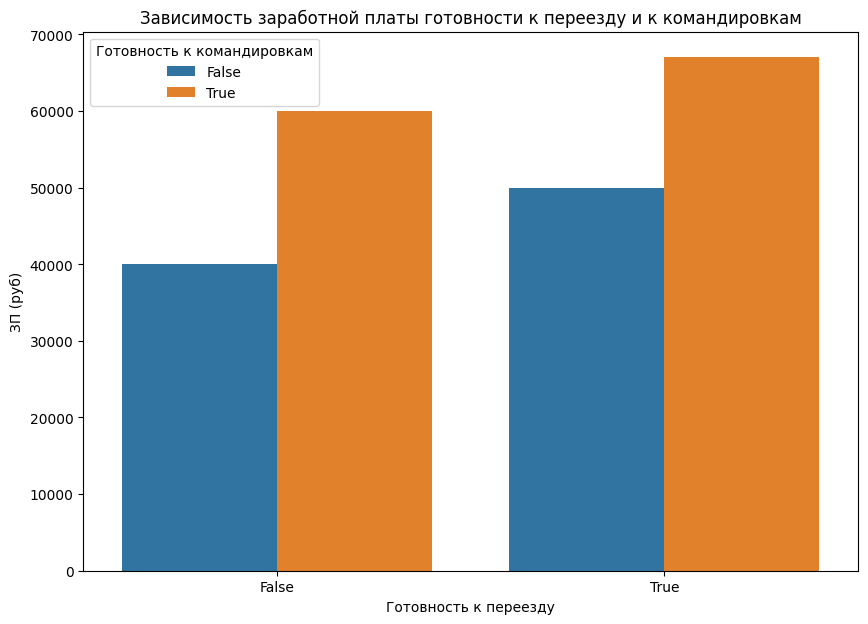

In [214]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=barplot_data,
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам'
)
barplot.set_title('Зависимость заработной платы готовности к переезду и к командировкам');

Соискатели готовые к командировкам и переездам указывают более высокую желаемую ЗП. Также можно отметить, что при командировках указывают большую ЗП, чем при переездах, - люди охотнее соглашаются на переезд, поэтому готовы получать меньше, чем периодически ездить в командировки.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [215]:
# ваш код здесь
heatmap_data = hh_data.groupby(
    by=['Возраст','Образование'], as_index=0)['ЗП (руб)'].median()

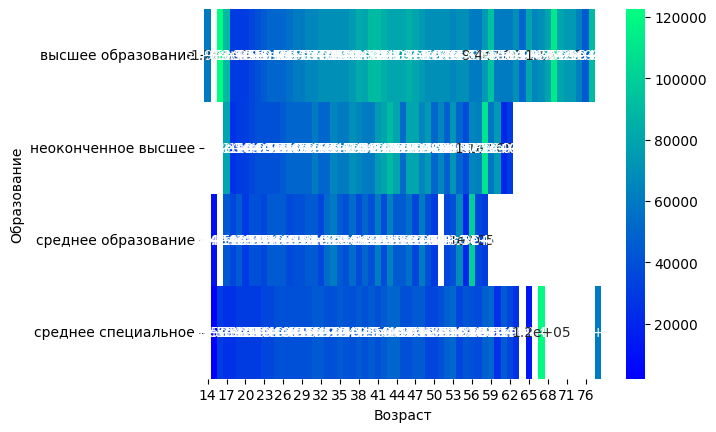

In [217]:
pivot = heatmap_data.pivot_table(
    values='ЗП (руб)',
    columns='Возраст',
    index='Образование',
)
sns.heatmap(data=pivot, annot=True, cmap='winter')
plt.show()

In [ ]:
heatmap_data

ваши выводы здесь

На данной тепловой карте можно наблюдать, что во всех категориях образования идёт увеличение уровня желаемой зарплаты с увеличением возраста. Соискатели с большим возрастом как правило указыают низкий уровень ЗП.

Наибольшая интенсивность роста заработной платы у соискателей с высшим образованием, самая низкая - у соискателей со среднеспециальным образованием.

Можно наблюдать, что соискатели с высшим образованием указывают более высокую ЗП, чем другие категории. К тому же люди с высшим образованием работают дольше - на графике больше значений по возрасту, чем в других группах.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

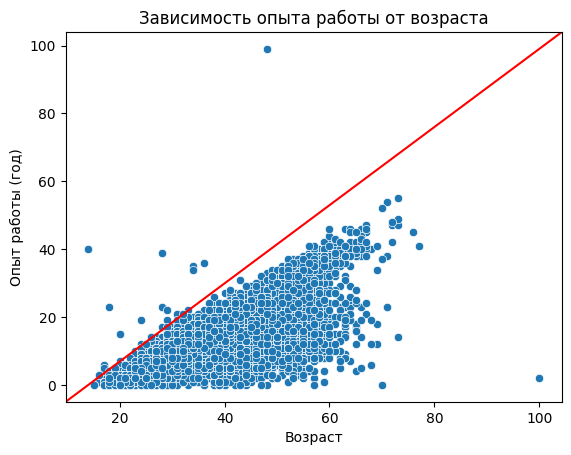

In [231]:
# ваш код здесь
hh_data['Опыт работы (год)'] = round(hh_data['Опыт работы (месяц)']/12) # переводим месяцы в годы

fig = sns.scatterplot(
    data=hh_data,
    x='Возраст',
    y='Опыт работы (год)'
    # hue='Exited'
)

fig.plot([0, 1], [0, 1], color='red', transform=fig.transAxes)
plt.title('Зависимость опыта работы от возраста')
plt.show()


ваши выводы здесь

На диаграмме наблюдаются аномалии. Возраст соискателя не может быть равен или меньше опыта работы.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь
# 1) Найдём число полных дубликатов таблице sber_data. Предварительно создадим список столбцов dupl_columns,
# по которым будем искать совпадения (все столбцы, не включая id).
dupl_columns = list(hh_data.columns)

mask = hh_data.duplicated(subset=dupl_columns)
hh_duplicates = hh_data[mask]
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')

In [236]:
# Для удаления дубликатов метод drop_duplicates().
hh_data = hh_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {hh_data.shape[0]}')

Результирующее число записей: 44586


In [238]:
hh_data.head(2)

Ищет работу на должность: Последнее/нынешнее место работы  \
0   Системный администратор         МАОУ "СОШ № 1 г.Немана"   
1      Технический писатель    Временный трудовой коллектив   

                       Последняя/нынешняя должность Обновление резюме  \
0                           Системный администратор  16.04.2019 15:59   
1  Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   

                             Авто          Образование Пол  Возраст  \
0  Имеется собственный автомобиль  неоконченное высшее   М       39   
1                      Не указано   высшее образование   М       60   

   Опыт работы (месяц)   Город  ...  проектная работа  волонтерство  \
0                202.0  другие  ...              True         False   
1                233.0  другие  ...              True         False   

   стажировка  полный день  сменный график  гибкий график  удаленная работа  \
0       False         True            True           True              True   
1       False         True            True           True              True   

   вахтовый метод  ЗП (руб)  Опыт работы (год)  
0            True   29000.0               17.0  
1           False   40000.0               19.0  

[2 rows x 24 columns]

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [240]:
# ваш код здесь
# Вывести на экран названия столбцов, где число пропусков больше 0. 
# Для этого вычислим средний по столбцам результат метода isnull(). Получим долю пропусков в каждом столбце.
# Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, сортируем по убыванию и выводим результат:
cols_null_percent = hh_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Опыт работы (месяц)                0.372314
Опыт работы (год)                  0.372314
Последняя/нынешняя должность       0.004486
Последнее/нынешнее место работы    0.002243
dtype: float64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [241]:
# ваш код здесь
hh_data = hh_data.dropna(axis=0, subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

In [ ]:
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'Опыт работы (месяц)': hh_data['Опыт работы (месяц)'].median(),
    'Опыт работы (год)': hh_data['Опыт работы (год)'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
hh_data = hh_data.fillna(values)

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [250]:
# ваш код здесь
#1) проверяем наличие таких резюме
outliers = hh_data[(hh_data['ЗП (руб)'] > 1000000) | (hh_data['ЗП (руб)'] < 1000)]
print(outliers.shape[0])

89


In [ ]:
#2) Удаляем такие резюме. Для этого можно воспользоваться методом drop() и удалить записи по их индексам:
hh_data = hh_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {hh_data.shape[0]}')

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [252]:
# ваш код здесь
outliers = hh_data[(hh_data['Опыт работы (год)'] > hh_data['Возраст'])]
print(outliers.shape[0])

5


In [253]:
hh_data = hh_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {hh_data.shape[0]}')

Результирующее число записей: 44490


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

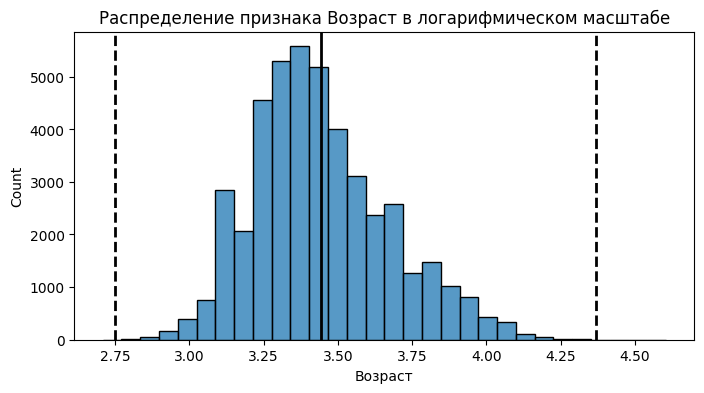

In [254]:
# ваш код здесь
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(hh_data['Возраст'])
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 4 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Распределение признака Возраст в логарифмическом масштабе');

Распределение ассимитрично в правую сторону.

ваш коммментарий здесь

In [255]:
# функция метода z-отклонения
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]) # не прибавляем 0, так как у нас нет нулевых значений возраста
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    
    lower_bound = mu - left * sigma 
    upper_bound = mu + right * sigma
    
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score_mod(hh_data, 'Возраст', log_scale=1, right=4)

In [256]:
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Число оставшихся значений по методу z-отклонения: {cleaned.shape[0]}')
display(outliers['Возраст'])

Число выбросов по методу z-отклонения: 3
Число оставшихся значений по методу z-отклонения: 44487


31137     15
32950     15
33654    100
Name: Возраст, dtype: int64

С учётом послабления правой границы на 1 получилось три выброса - 15, 15 и 100 лет